In [1]:
''' import '''
import scipy.io as io
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [2]:
''' load data '''
data = io.loadmat('./data/hw3_prob1b.mat')

A = data['A']
d = data['d']
x_orig = data['x_orig']

M, N = A.shape

In [3]:
''' hyper param '''
LAMBDA = 2
DELTA = 7
MAXITERS = 10000
CRIT = 1e-4

t = 1/la.norm(A, ord=2)**2 # step size

In [4]:
''' function '''
def soft_thres(z, t):
    return np.sign(z)*np.maximum(np.abs(z) - t, 0)

def hard_thres(z, t):
    return np.where(np.abs(z) >= t, z, 0)

def trunc(z, t):
    return np.sign(z)*np.minimum(np.abs(z), t)

In [5]:
''' conventional L1-norm (FISTA)  '''

f_hist_conv = []

x = np.zeros((N, 1))
y = x
x_prev = x

W = np.ones((N, 1)) # fixed W

for k in range(MAXITERS):

    # f
    f = 1/2*la.norm(A@x - d)**2 + LAMBDA*la.norm(W*x, 1)
    grad_gy = A.T@(A@y - d)

    # update x, y
    x = soft_thres(y - t*grad_gy, LAMBDA*t*W)
    y = x + k/(k+3)*(x - x_prev)

    # stop condition
    if (k >= 1) and (la.norm(x - x_prev, 2)/la.norm(x, 2) < CRIT):
        break
    
    x_prev = x
    
    # history
    f_hist_conv.append(f)

    print(f'i = {k}, f = {f}')

# optimal
x_conv = x

i = 0, f = 132520.32617243959
i = 1, f = 25917.770605759782
i = 2, f = 13929.853328245192
i = 3, f = 11302.66476878548
i = 4, f = 10746.190220357517
i = 5, f = 10495.480084756402
i = 6, f = 10258.99222453203
i = 7, f = 10026.134068802634
i = 8, f = 9803.327695506146
i = 9, f = 9593.156788153792
i = 10, f = 9394.030311194463
i = 11, f = 9207.159888270024
i = 12, f = 9031.00034571646
i = 13, f = 8862.431695501358
i = 14, f = 8704.573691559533
i = 15, f = 8555.885999842907
i = 16, f = 8417.30858842466
i = 17, f = 8289.293286596527
i = 18, f = 8169.37631425485
i = 19, f = 8054.71815340292
i = 20, f = 7946.789782049971
i = 21, f = 7848.037049659385
i = 22, f = 7753.15355888598
i = 23, f = 7665.348954085673
i = 24, f = 7582.468929123047
i = 25, f = 7503.974755699721
i = 26, f = 7428.903989095855
i = 27, f = 7359.380403273765
i = 28, f = 7294.030538412033
i = 29, f = 7230.974347205225
i = 30, f = 7171.883643593723
i = 31, f = 7115.365511942509
i = 32, f = 7060.013627553426
i = 33, f = 7007.29

In [6]:
''' reweighted L1-norm (FISTA) '''

f_hist_rewei = []

# x = np.zeros((N, 1))
x = x_conv # initial x_1
y = x

W = np.ones((N, 1))
DELTA = 10

for k in range(MAXITERS):

    # f
    f = 1/2*la.norm(A@x - d)**2 + LAMBDA*la.norm(W*x, 1)
    grad_gy = A.T@(A@y - d)

    # update x, y
    x = soft_thres(y - t*grad_gy, LAMBDA*t*W)
    y = x + k/(k+3)*(x - x_prev)
    W = 1 / (np.abs(x) + DELTA) # changable W

    # stop condition
    if (k >= 1) and (la.norm(x - x_prev, 2)/la.norm(x, 2) < CRIT):
        break
    
    x_prev = x
    
    # history
    f_hist_rewei.append(f)

    print(f'i = {k}, f = {f}')

# optimal
x_rewei = x

i = 0, f = 5348.116535964485
i = 1, f = 242.8861105607079
i = 2, f = 182.28194181889137
i = 3, f = 170.0619736067318
i = 4, f = 167.1640358743165
i = 5, f = 165.75256317564393
i = 6, f = 164.60932867083264
i = 7, f = 163.6084844982397
i = 8, f = 162.70821533447557
i = 9, f = 161.88673466445888
i = 10, f = 161.13762789810949
i = 11, f = 160.45169107061258
i = 12, f = 159.8054195953994
i = 13, f = 159.20957913727207
i = 14, f = 158.65130110780413
i = 15, f = 158.12763869805386
i = 16, f = 157.64464008936727
i = 17, f = 157.19425610633388
i = 18, f = 156.78123213104783
i = 19, f = 156.4147941063609
i = 20, f = 156.0729217766296
i = 21, f = 155.7566818807655
i = 22, f = 155.46052878817693
i = 23, f = 155.1847154459966
i = 24, f = 154.92606538946606
i = 25, f = 154.68773639074644
i = 26, f = 154.45562329144093
i = 27, f = 154.24812047199302
i = 28, f = 154.04687360328413
i = 29, f = 153.85611449688167
i = 30, f = 153.6758723863093
i = 31, f = 153.50404985979924
i = 32, f = 153.3422867936267

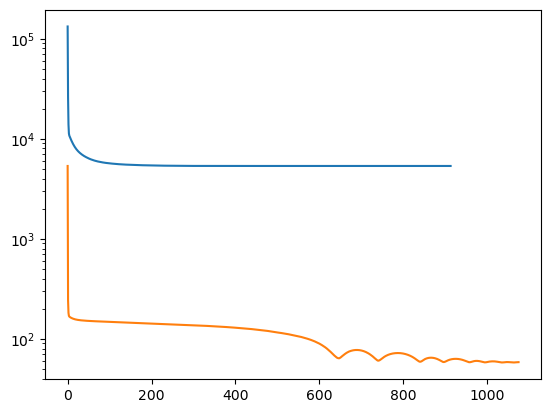

In [7]:
plt.semilogy(f_hist_conv)
plt.semilogy(f_hist_rewei)

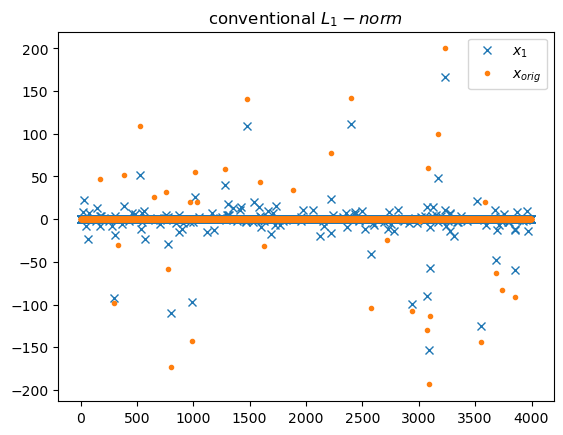

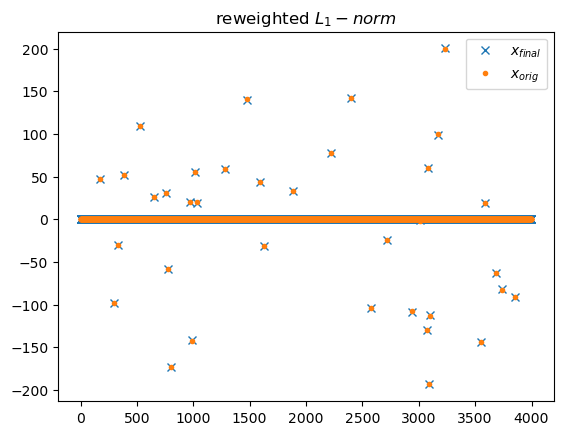

In [8]:
# plot
plt.title('conventional $L_1-norm$')
plt.plot(x_conv, linestyle='', marker='x', label='$x_1$')
plt.plot(x_orig, linestyle='', marker='.', label='$x_{orig}$')
plt.legend()
plt.show()

plt.title('reweighted $L_1-norm$')
plt.plot(x_rewei, linestyle='', marker='x', label='$x_{final}$')
plt.plot(x_orig, linestyle='', marker='.', label='$x_{orig}$')
plt.legend()
plt.show()

In [9]:
# ''' find delta : reweighted L1-norm (FISTA)  '''

# f_delta_hist = []
# x_delta_hist = []

# delta_list = np.arange(1, 10, 0.1)

# for delta in delta_list:

#     x = np.zeros((N, 1))
#     y = x

#     W = np.ones((N, 1))

#     for k in range(MAXITERS):

#         # f
#         f = 1/2*la.norm(A@x - d)**2 + LAMBDA*la.norm(W*x, 1)
#         grad_gy = A.T@(A@y - d)

#         # update x, y
#         x = soft_thres(y - t*grad_gy, LAMBDA*t*W)
#         y = x + k/(k+3)*(x - x_prev)
#         W = 1 / (np.abs(x) + delta) # changable W

#         # stop condition
#         if (k >= 1) and (la.norm(x - x_prev, 2)/la.norm(x, 2) < CRIT):
#             break
        
#         x_prev = x
        
#     # optimal
#     f_delta_hist.append(f)
#     x_delta_hist.append(x)
    
#     print(f'delta = {delta}, iter = {k}, f = {f}')

In [10]:
# # plot
# plt.title('appropriate $\\delta$')
# plt.plot(f_delta_hist)

# plt.xlabel('$\\delta$')
# plt.ylabel('f')
# plt.vlines(51, 50, 65, colors='red', linestyles='--', label='$\\delta = 6.1$')
# plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# plt.legend()
# plt.grid()
# plt.show()